# HR Analytics Project- Understanding the Attrition in HR
Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


In [25]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [26]:
data=pd.read_csv('HR-Employee-Attrition.csv')
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


Attrition is our target, so this will be a classification problem

In [27]:
data.shape

(1470, 35)

In [28]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [29]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

A range of different data types

In [30]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [31]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null values in dataset

In [32]:
#descriptive statistic analysis
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Target is categorical, so this looks like a logistic regression problem

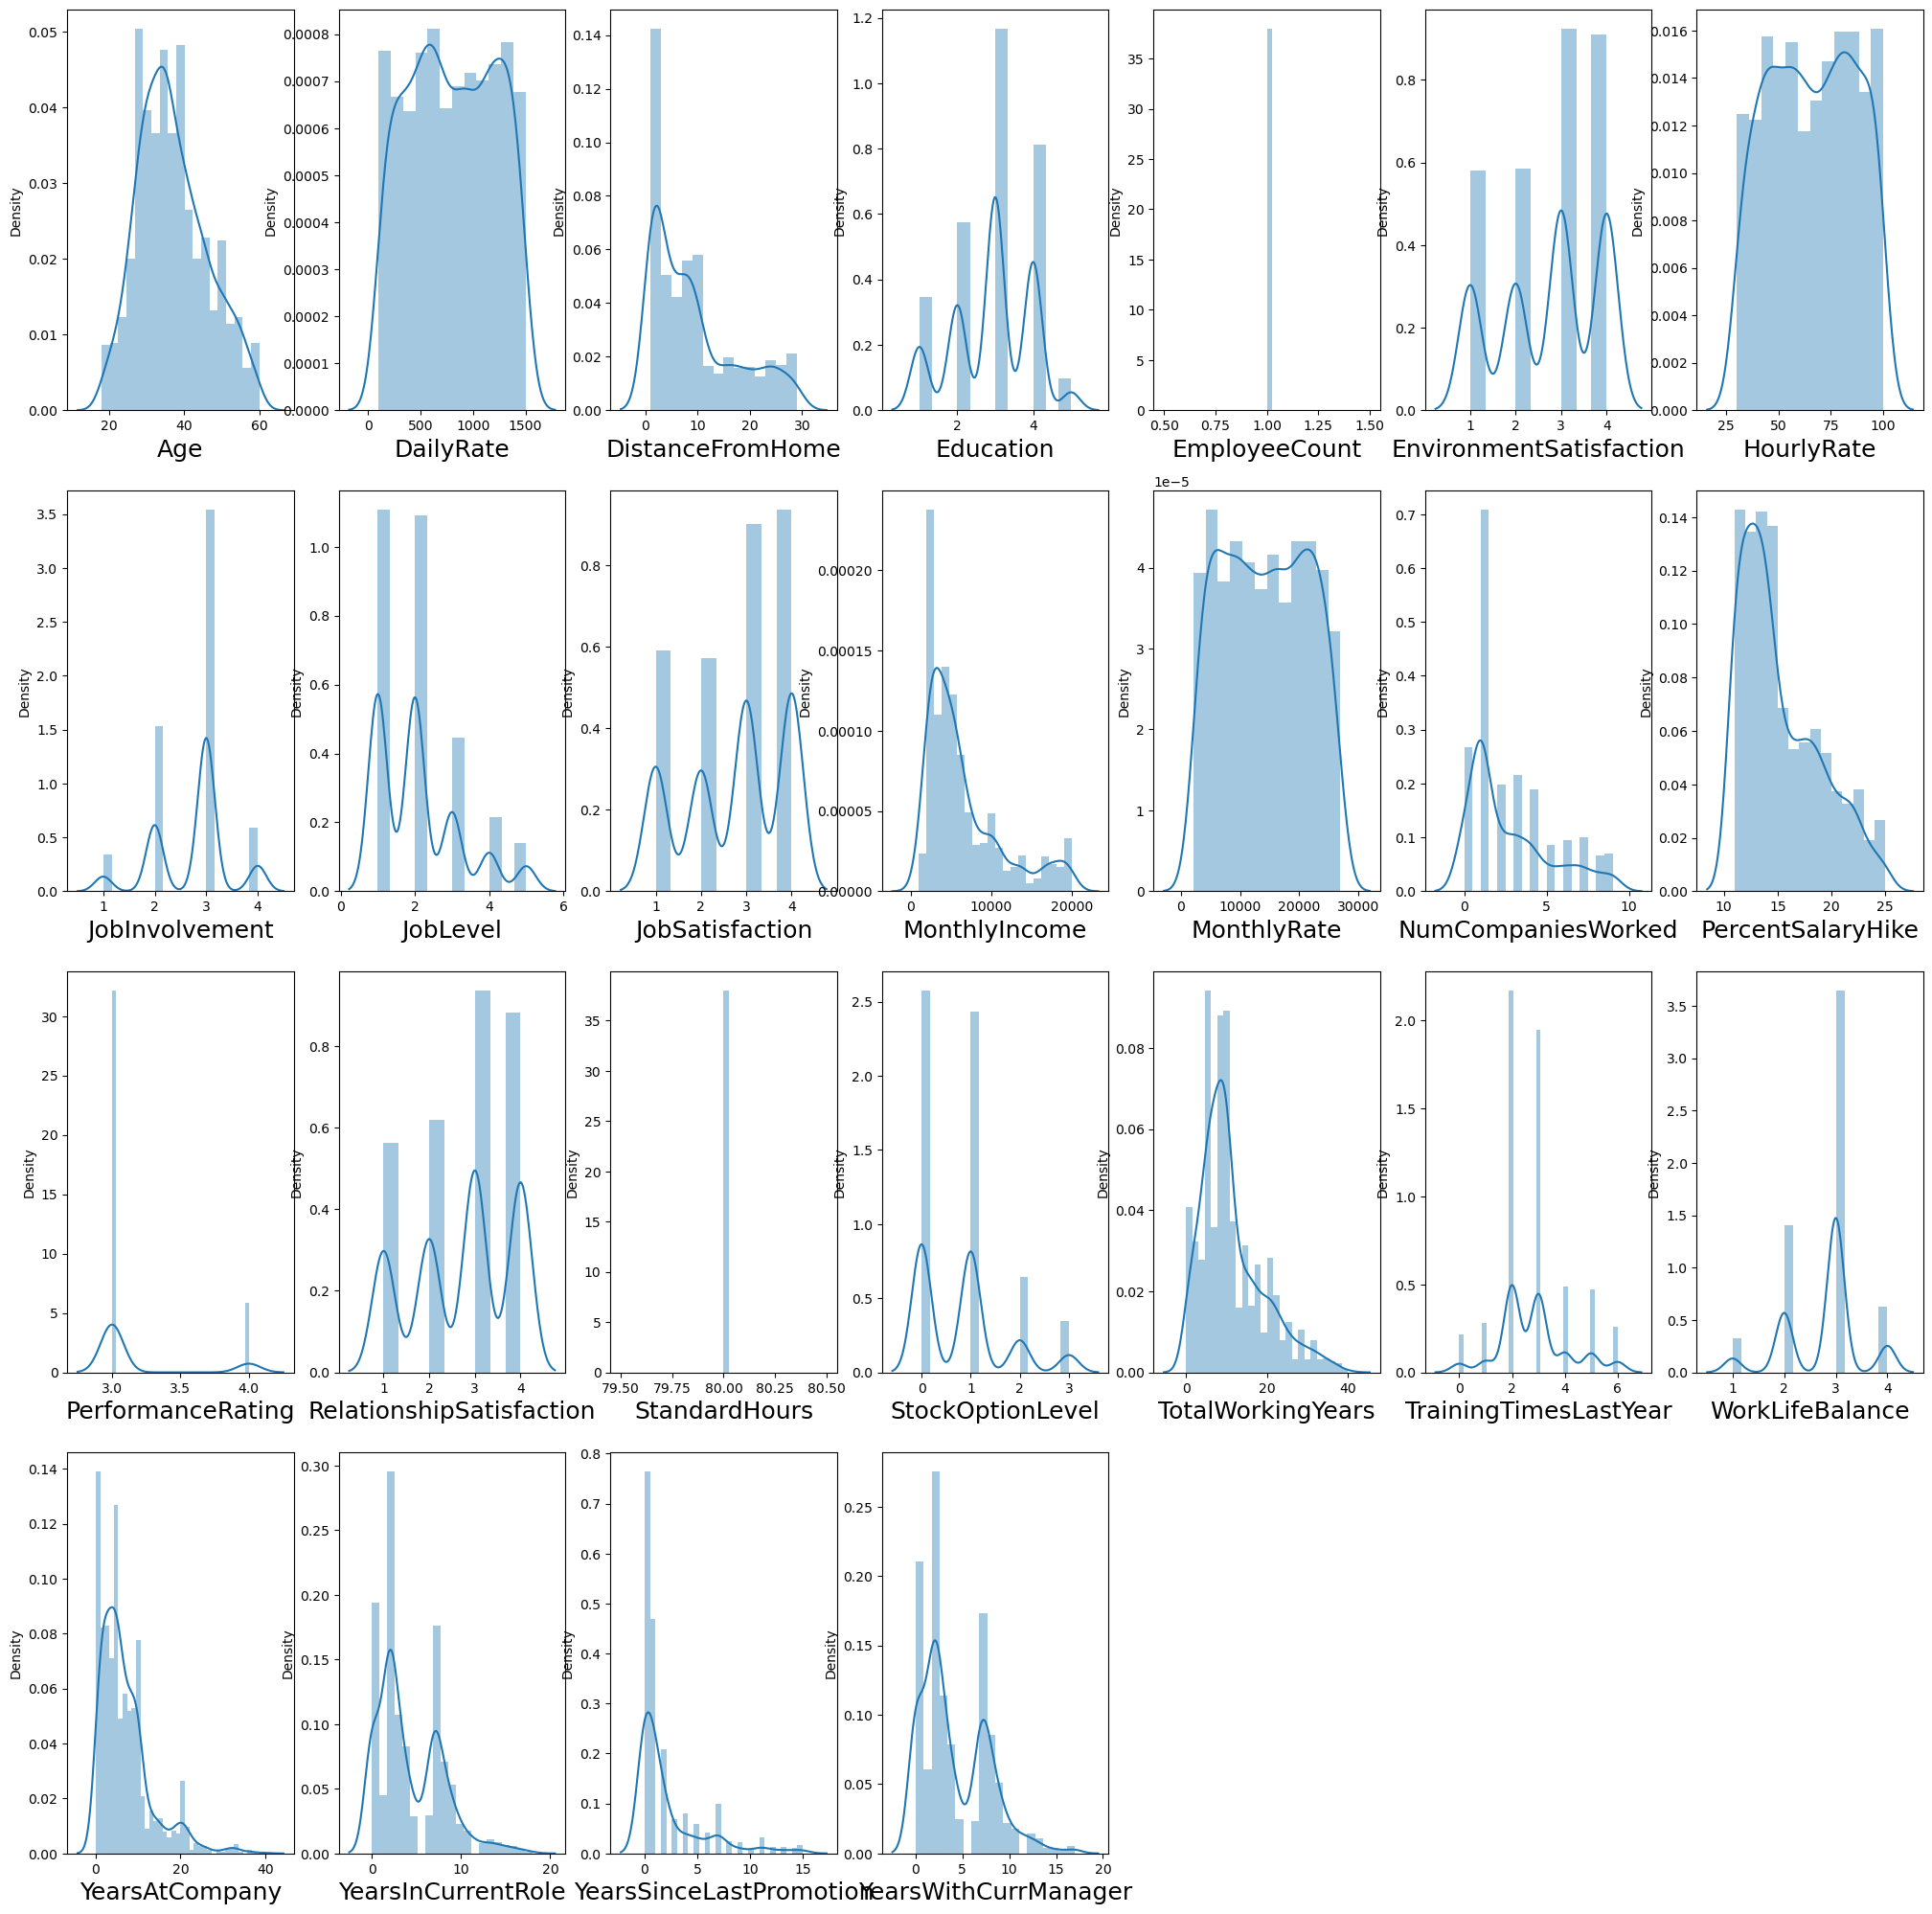

In [33]:
#Use distplots to check distribution of the numerical data
columns = ['Age','DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
     'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

plotnumber = 1
plt.figure(figsize=(25,25))
for column in columns:
    if plotnumber <= 27:
        ax = plt.subplot(4, 7, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()

Many features are suffering from negative skewness. Also, important insights such as low amount of years being worked at the company, in the current role or since last promotion have emerged. The majority of staff are in the lower end of monthly income and the salary increase isn't particularly high. 

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

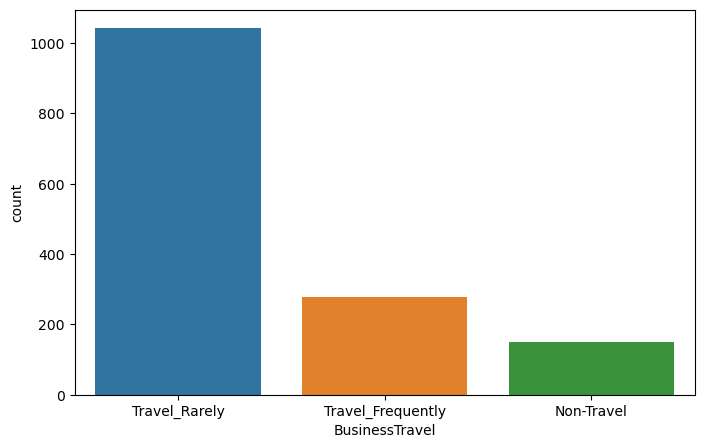

In [34]:
#Exploring non-numerical data
plt.figure(figsize=(8,5))
sns.countplot(data['BusinessTravel'])

Not many opportunities for business travel

<AxesSubplot:xlabel='Education', ylabel='count'>

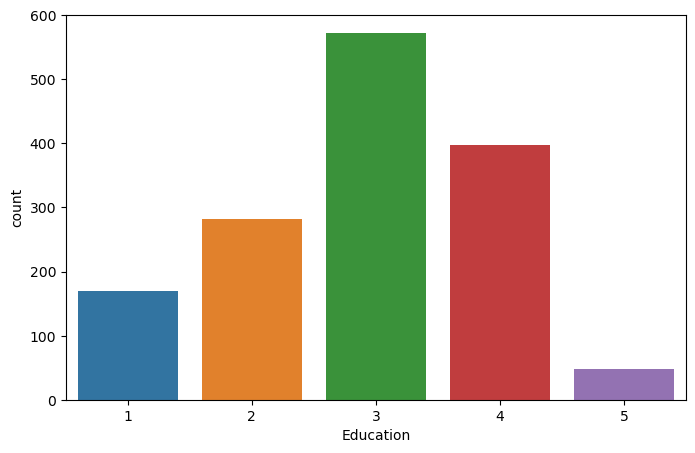

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(data['Education'])

1-5 could refer to the grade the individual attained. The majority of staff achieved '3'

<AxesSubplot:xlabel='EducationField', ylabel='count'>

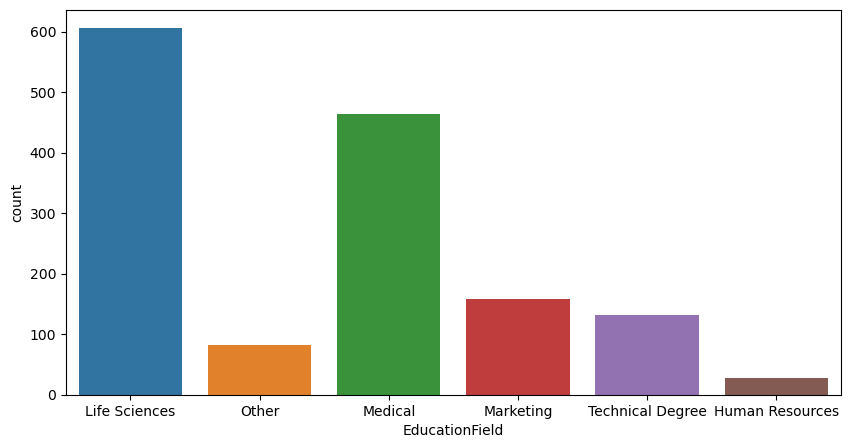

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data['EducationField'])

Highest count of employee is from life sciences and lowest is HR. It will be interesting to compare these fields with the target.

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

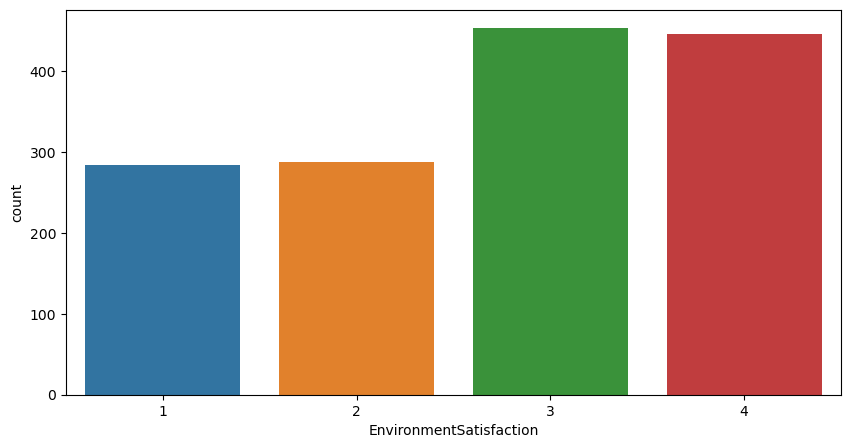

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data['EnvironmentSatisfaction'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

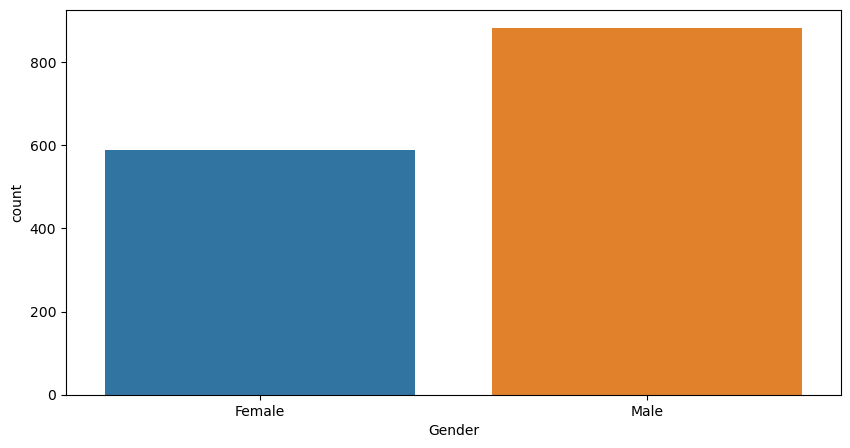

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data['Gender'])

Higher number of men working there.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

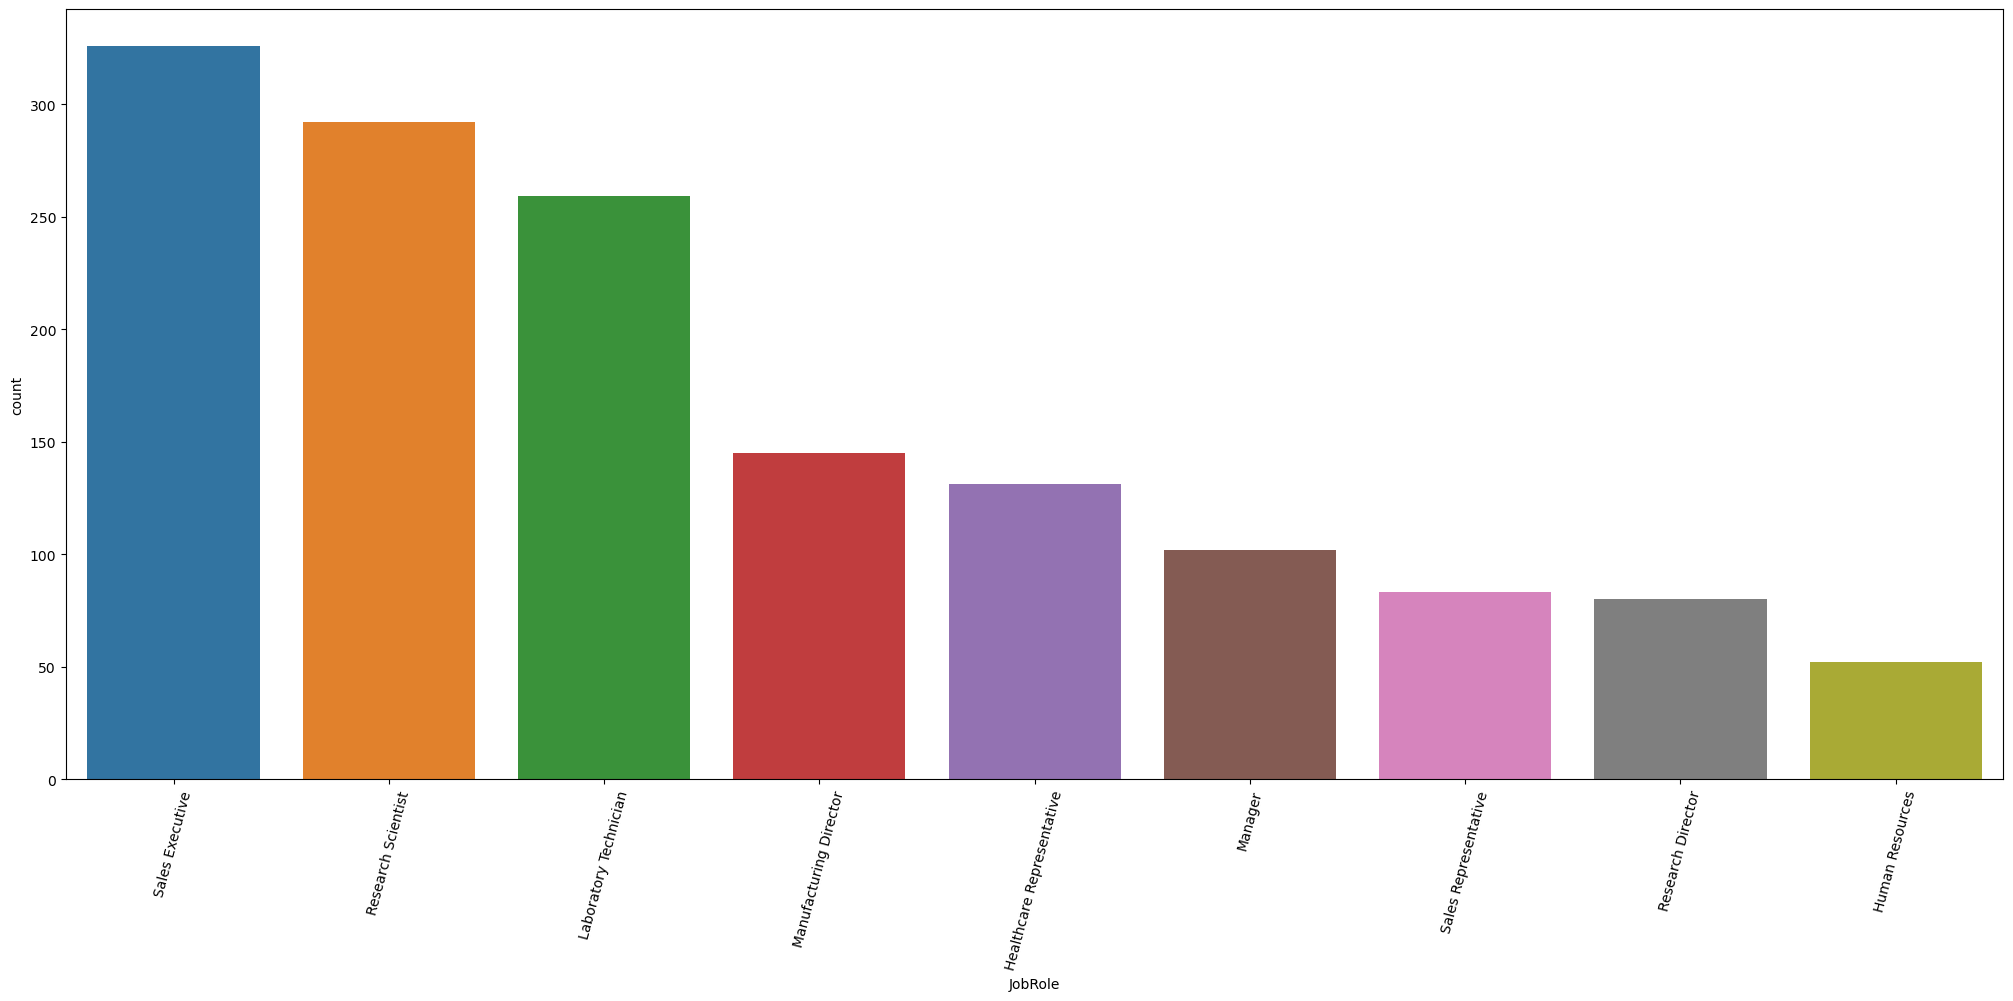

In [39]:
plt.figure(figsize=(25,10))
sns.countplot(data['JobRole'])
plt.xticks(rotation=75)

High numbers of sales executives, research scientists, lab technicians and very low levels of HR staff

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

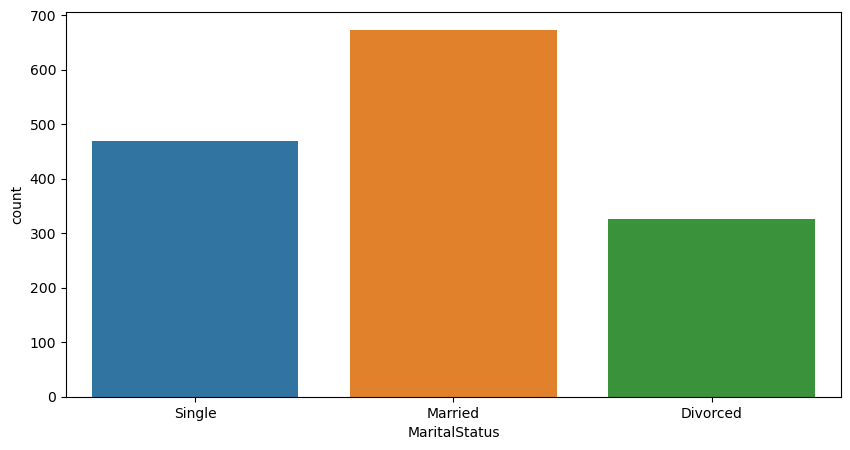

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(data['MaritalStatus'])

Majority of staff married

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

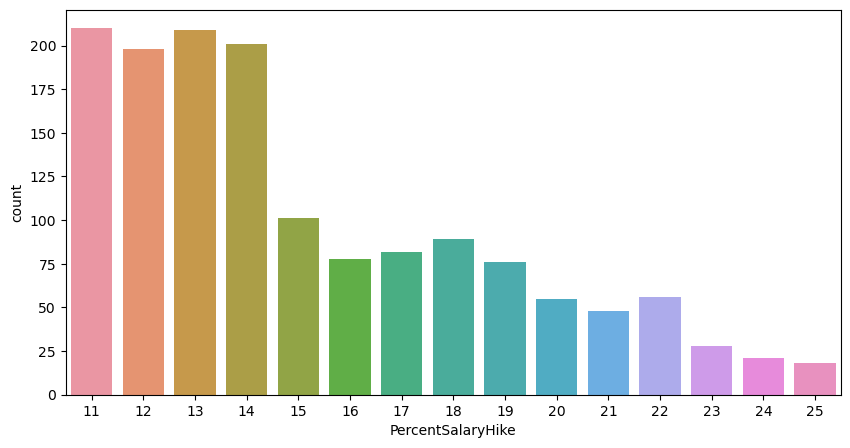

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(data['PercentSalaryHike'])

Generally low increase in percentage of salary 

<AxesSubplot:xlabel='OverTime', ylabel='count'>

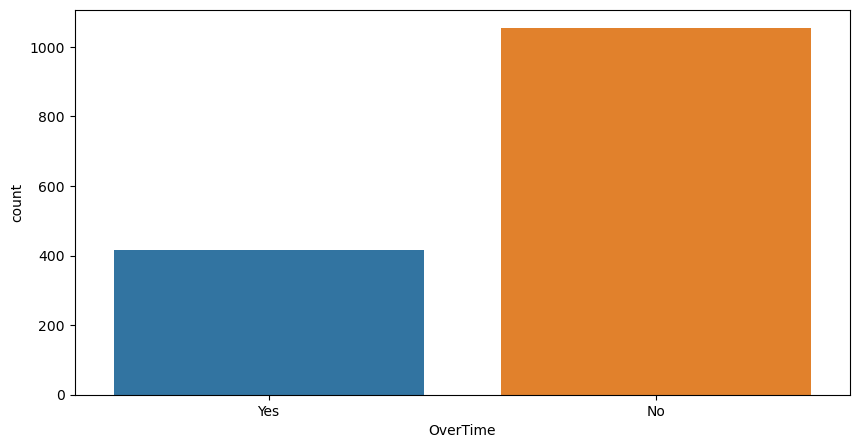

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data['OverTime'])

Despite negative skew for monthly income and salary hike, the majority of people didn't opt for overtime 

<AxesSubplot:xlabel='Attrition', ylabel='count'>

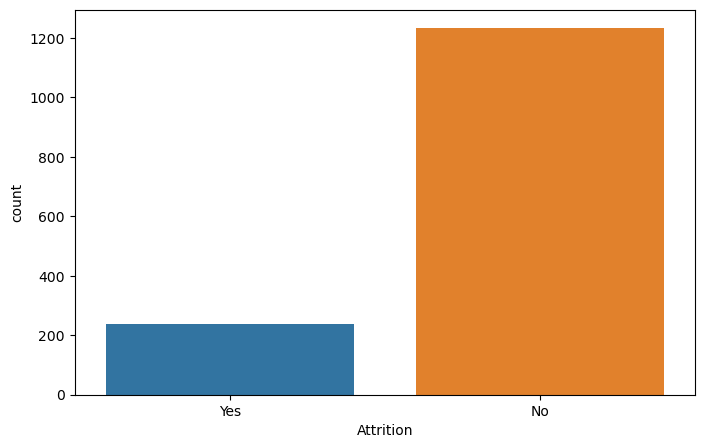

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(data['Attrition'])

Low rate of attrition

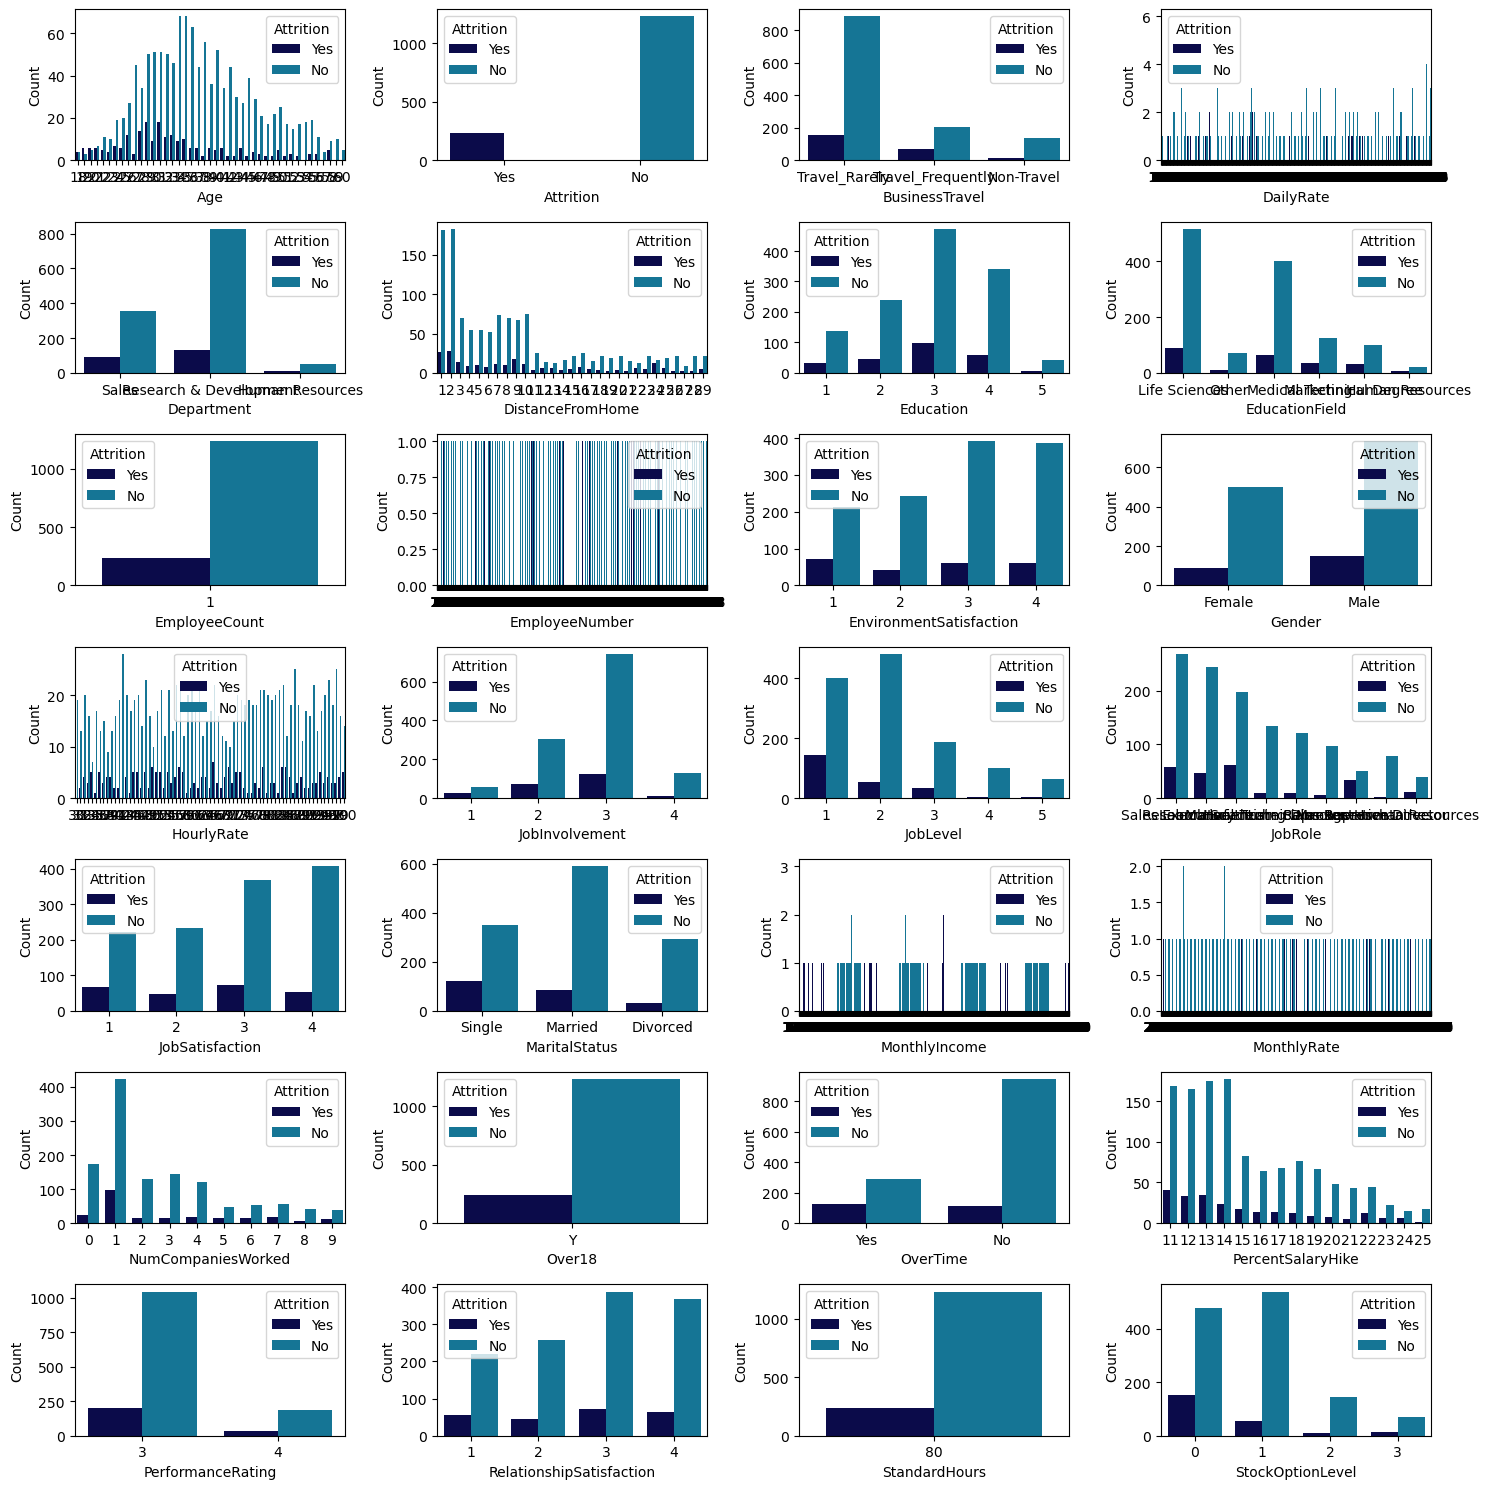

In [44]:
#Exploring relationship between features and target
plt.figure(figsize=(15, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 28:
        plt.subplot(7, 4, plotnumber)
        sns.countplot(x=column, hue='Attrition', data=data, palette='ocean')
        plt.xlabel(column)
        plt.ylabel('Count')
    plotnumber += 1

plt.tight_layout()
plt.show()



Looking at these, I have observed that attrition was high in those with low salary hike, without stock options, with lower performance ratings, lower amount of companies worked, in males (although it is male dominated workplace), with low job level and high job involvement.  

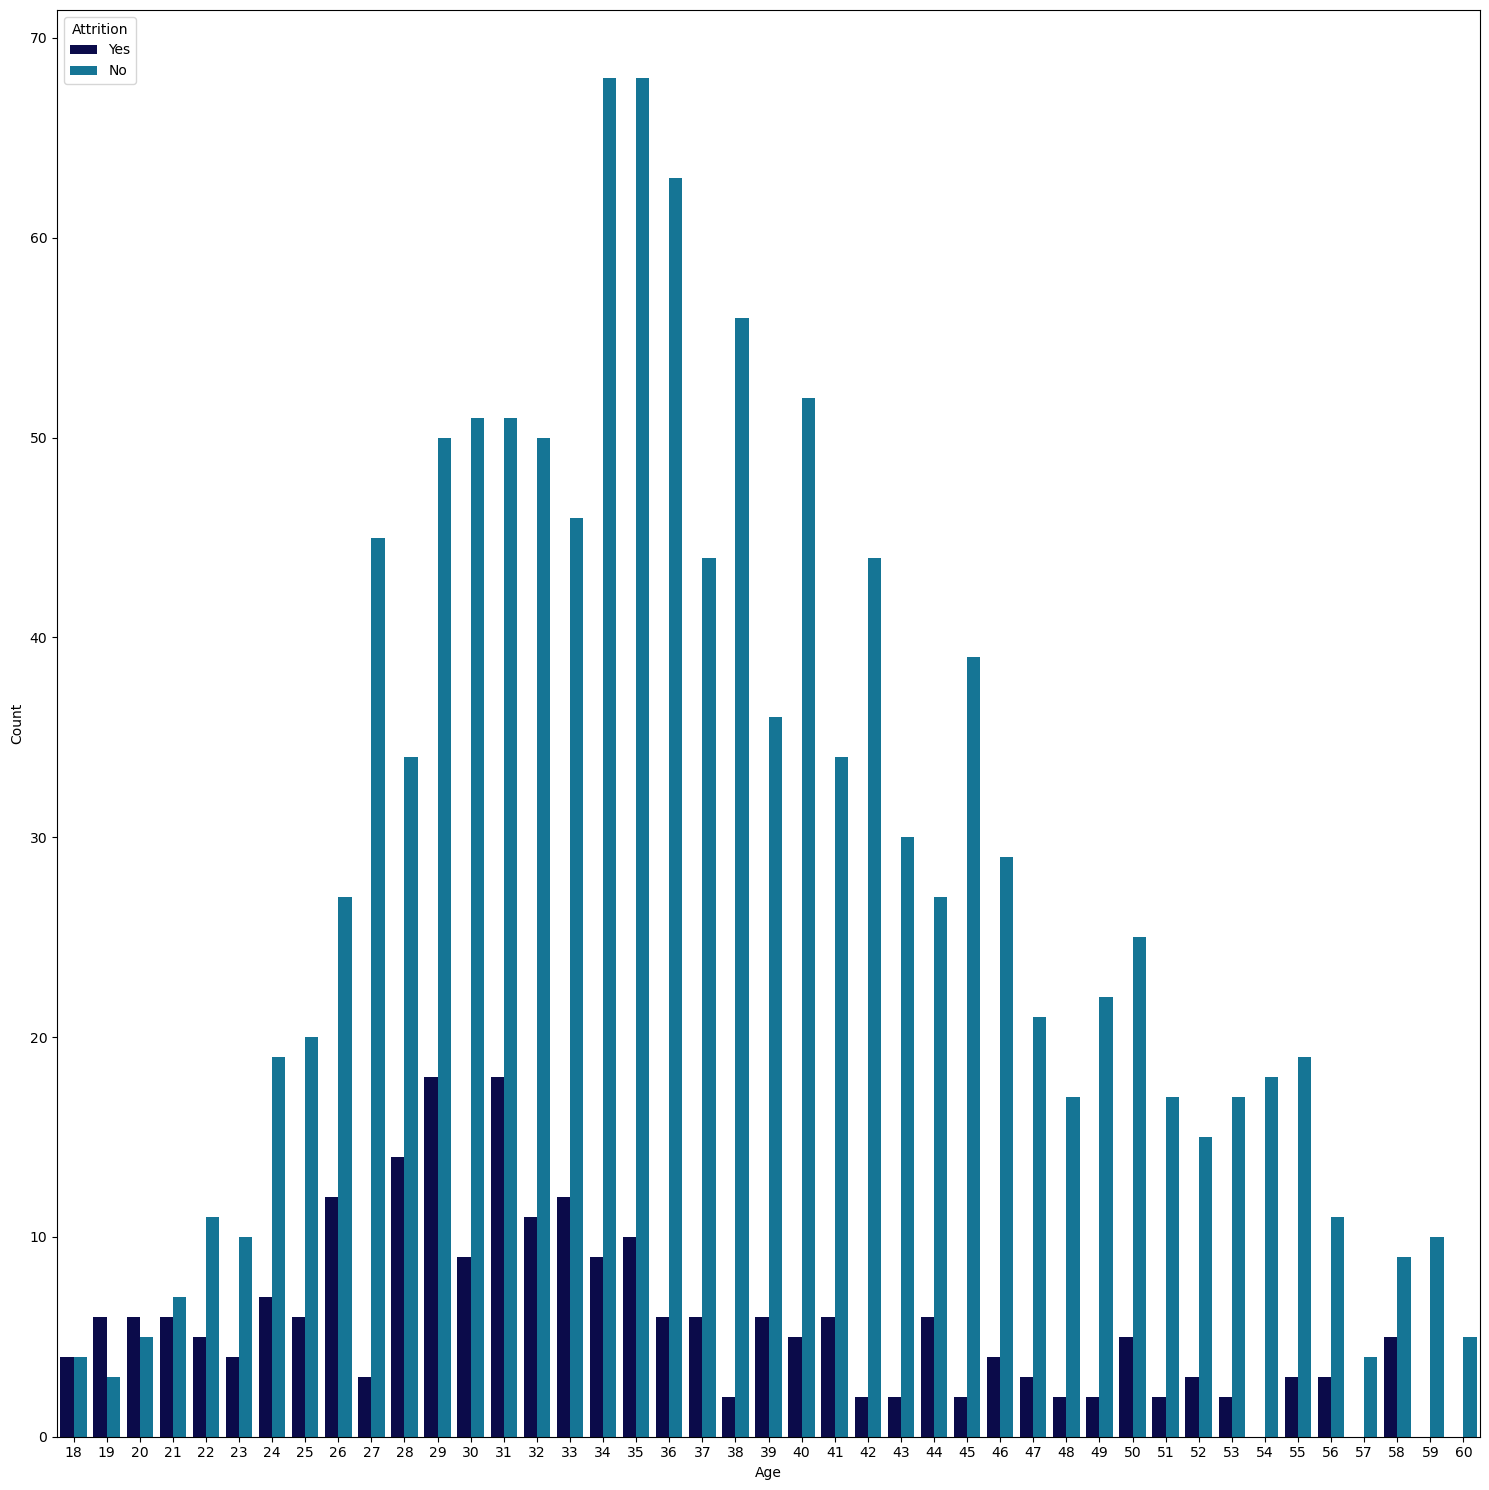

In [45]:
plt.figure(figsize=(15, 15))
sns.countplot(x='Age', hue='Attrition', data=data, palette='ocean')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

High levels of attrition between the ages of 25-35 and lower levels amongst the older staff members. Although, in terms of percentages, the ages 18-26 have the highest attrition rate where in some cases, the attrition rate was higher than people choosing not to leave. 

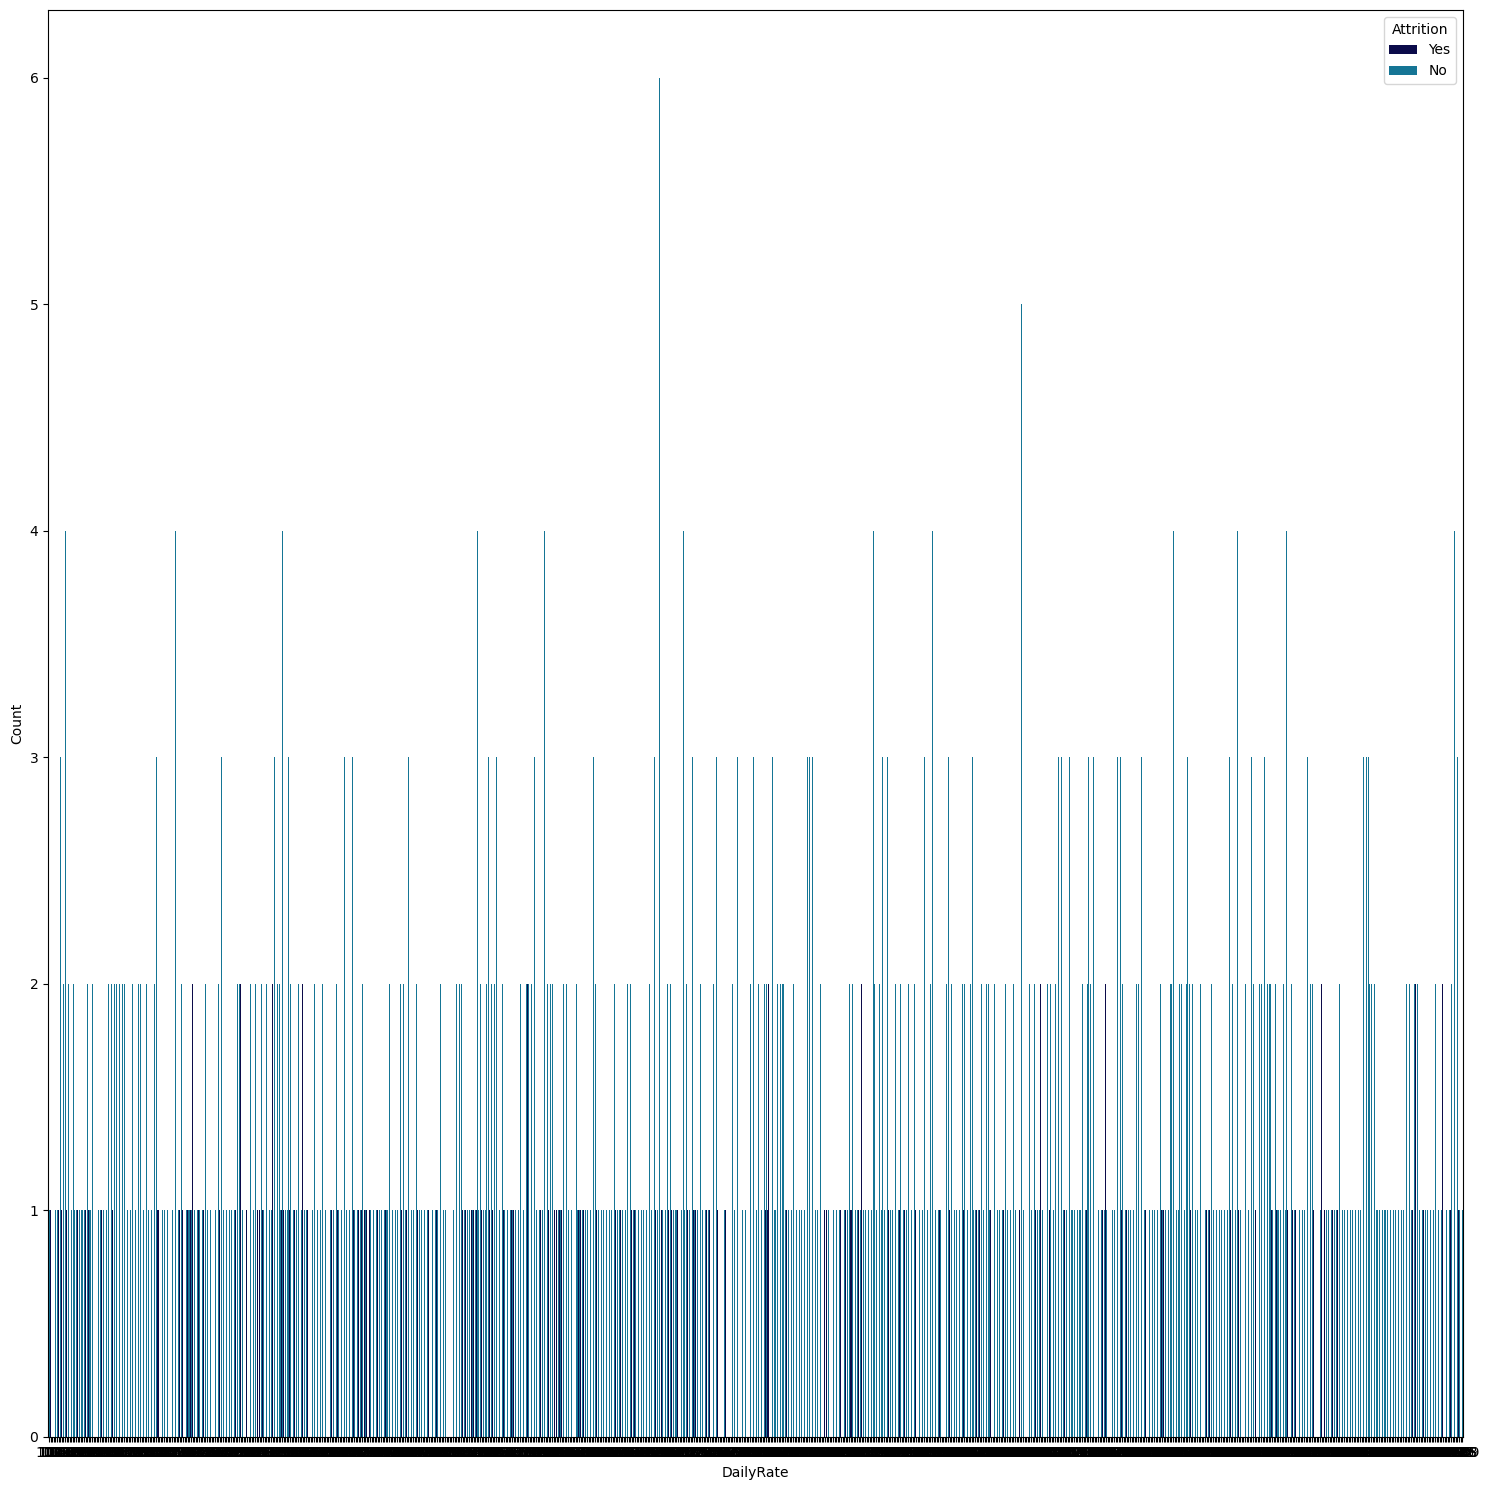

In [46]:
#Look at the relationship between DailyRate and attrition in more detail
plt.figure(figsize=(15, 15))
sns.countplot(x='DailyRate', hue='Attrition', data=data, palette='ocean')
plt.xlabel('DailyRate')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Far too many unique values to interpret. I will aggregate data to view graph.

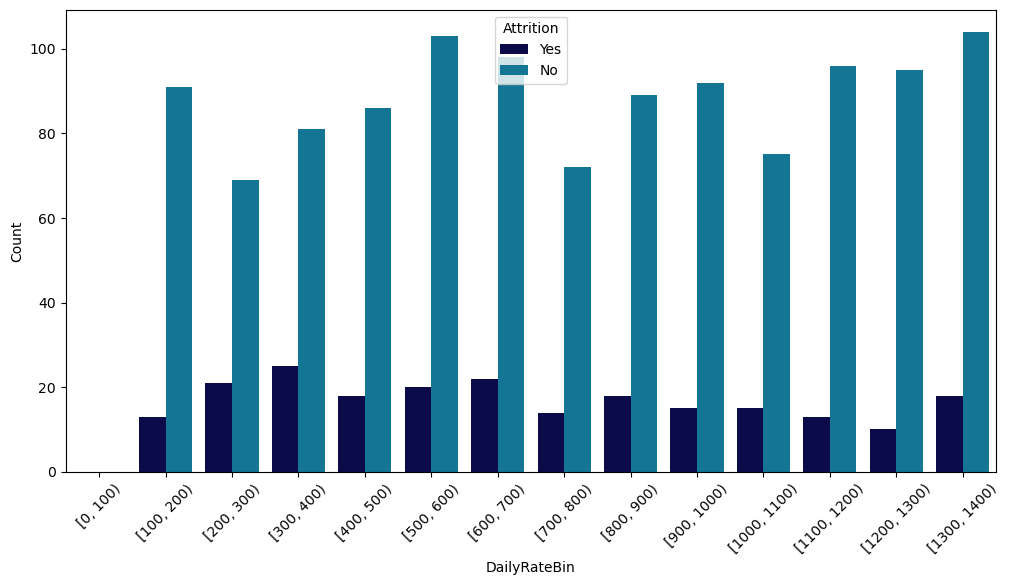

In [47]:
data['DailyRateBin'] = pd.cut(data['DailyRate'], bins=range(0, 1500, 100), right=False)
plt.figure(figsize=(12, 6))
sns.countplot(x='DailyRateBin', hue='Attrition', data=data, palette='ocean')
plt.xlabel('DailyRateBin')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()


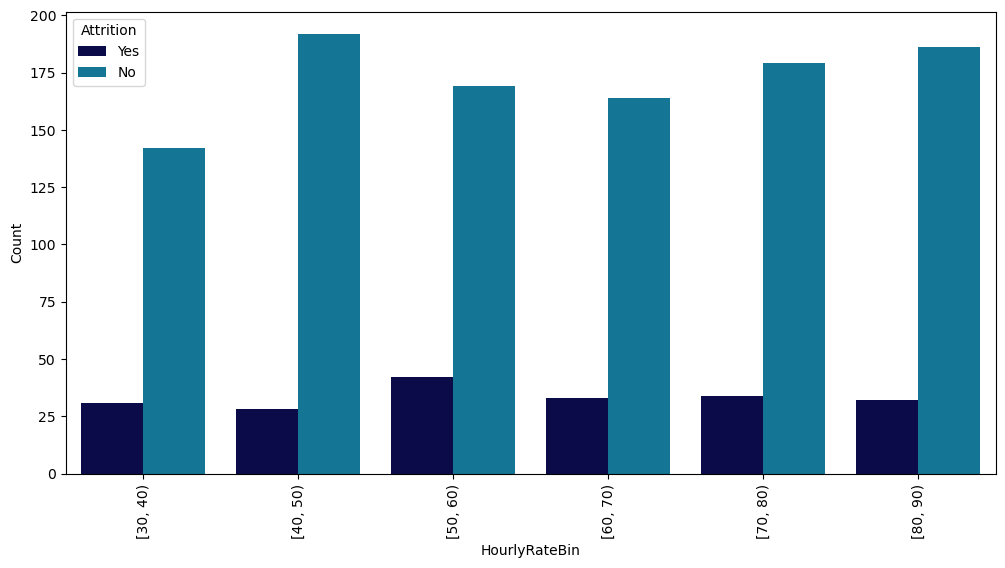

In [48]:
data['HourlyRateBin'] = pd.cut(data['HourlyRate'], bins=range(30, 100, 10), right=False)
plt.figure(figsize=(12, 6))
sns.countplot(x='HourlyRateBin', hue='Attrition', data=data, palette='ocean')
plt.xlabel('HourlyRateBin')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()


Despite salary hike having an impact on attrition, DailyRate nor hourly rate appear to show any significant patterns. 

<AxesSubplot:xlabel='Gender', ylabel='DailyRate'>

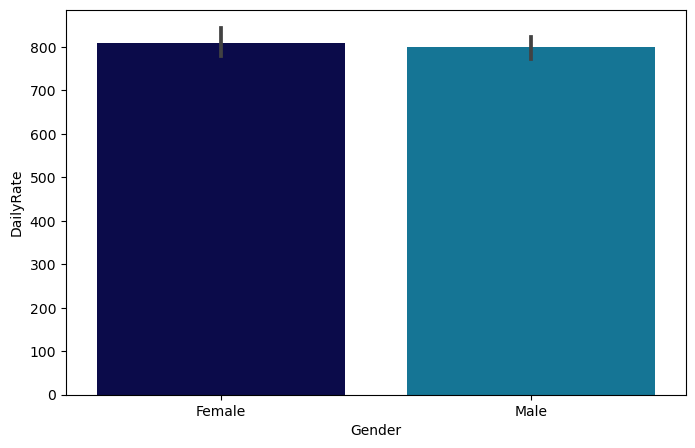

In [49]:
#Exploring hourly and daily rates between man and woman 
plt.figure(figsize=(8,5))
sns.barplot(x='Gender',y='DailyRate',data=data,palette='ocean')

Men and women both have fairly equal pay, so gender pay issues are not apparent. 

<Figure size 1000x500 with 0 Axes>

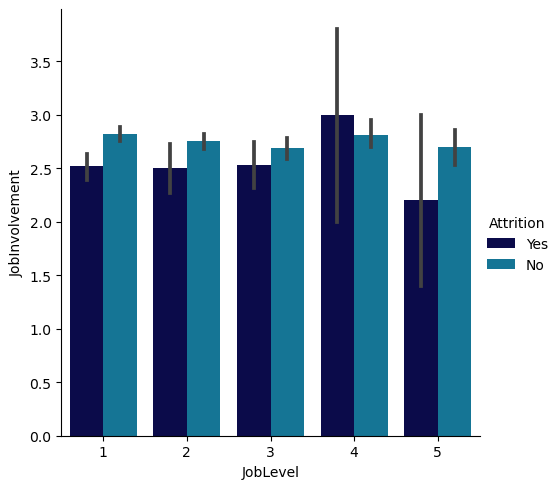

In [50]:
#Going to use catplots to compare multiple variables
plt.figure(figsize=(10,5))
sns.catplot(x='JobLevel',y='JobInvolvement',data=data, kind='bar' ,hue='Attrition',palette="ocean")

We can see that attrition is high with those who have a job level of 4 and an involvement of 3. 

<Figure size 1000x500 with 0 Axes>

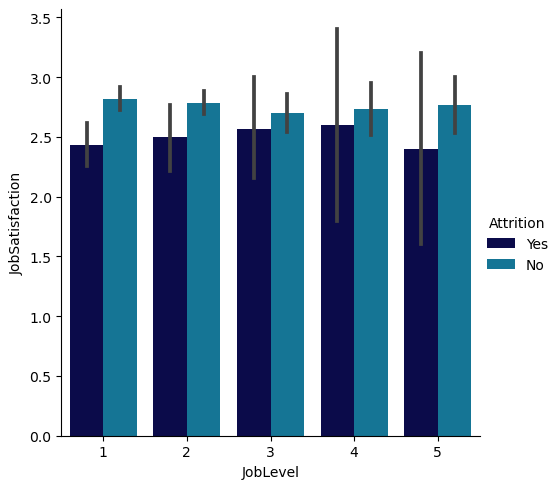

In [51]:
#Going to use catplots to compare multiple variables
plt.figure(figsize=(10,5))
sns.catplot(x='JobLevel',y='JobSatisfaction',data=data, kind='bar' ,hue='Attrition',palette="ocean")

Attrition is spread pretty equally between job levels in regards to job satisfaction

<Figure size 1000x500 with 0 Axes>

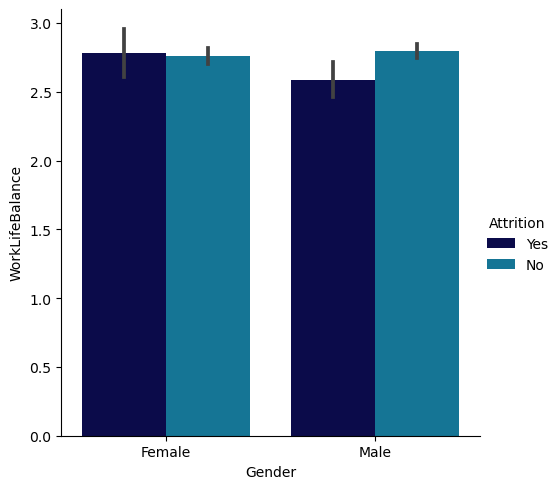

In [52]:
plt.figure(figsize=(10,5))
sns.catplot(x='Gender',y='WorkLifeBalance',data=data, kind='bar' ,hue='Attrition',palette="ocean")

Attrition is high in both columns. However, women who have poor worklifbalance have higher attrition. Are there opportunities to improve worklifebalance, particularly for the women?

<Figure size 1000x500 with 0 Axes>

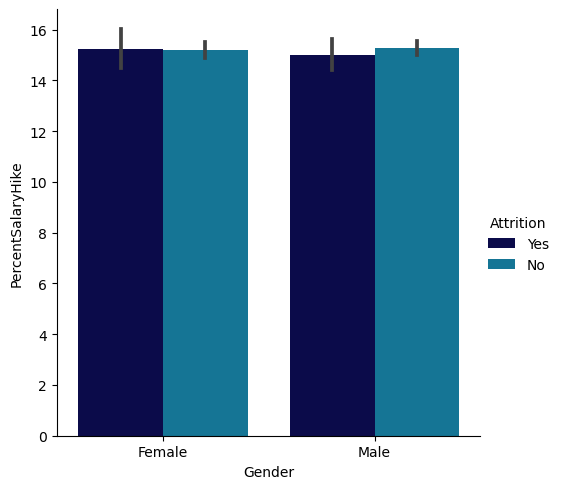

In [53]:
plt.figure(figsize=(10,5))
sns.catplot(x='Gender',y='PercentSalaryHike',data=data, kind='bar' ,hue='Attrition',palette="ocean")

Chances of attrition are equally high in men and women depending on salary hike. Perhaps slightly higher in women.

<Figure size 1000x500 with 0 Axes>

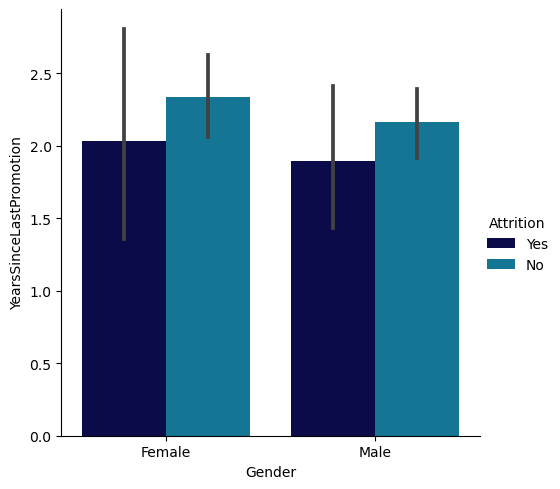

In [54]:
plt.figure(figsize=(10,5))
sns.catplot(x='Gender',y='YearsSinceLastPromotion',data=data, kind='bar' ,hue='Attrition',palette="ocean")

Both genders have a high chance of attrition after approximately 2 years, although this is higher in females.

<Figure size 1200x400 with 0 Axes>

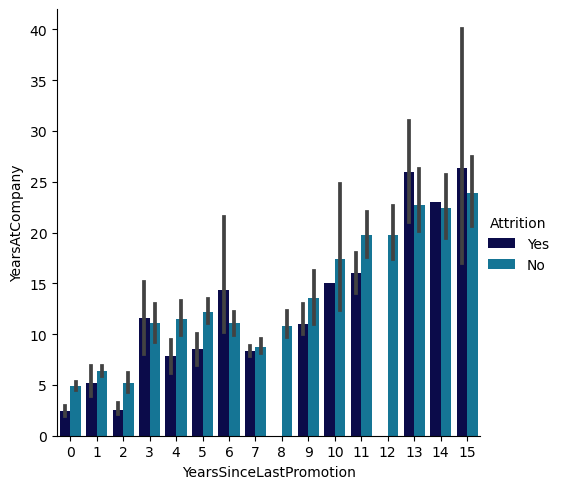

In [55]:
plt.figure(figsize=(12,4))
sns.catplot(x='YearsSinceLastPromotion',y='YearsAtCompany',data=data, kind='bar' ,hue='Attrition',palette="ocean")


Here we can see a very distinct trend between years at the company, years since last promotion and attrition. Increasing the rate of promotion would have a positive impact on attrition.

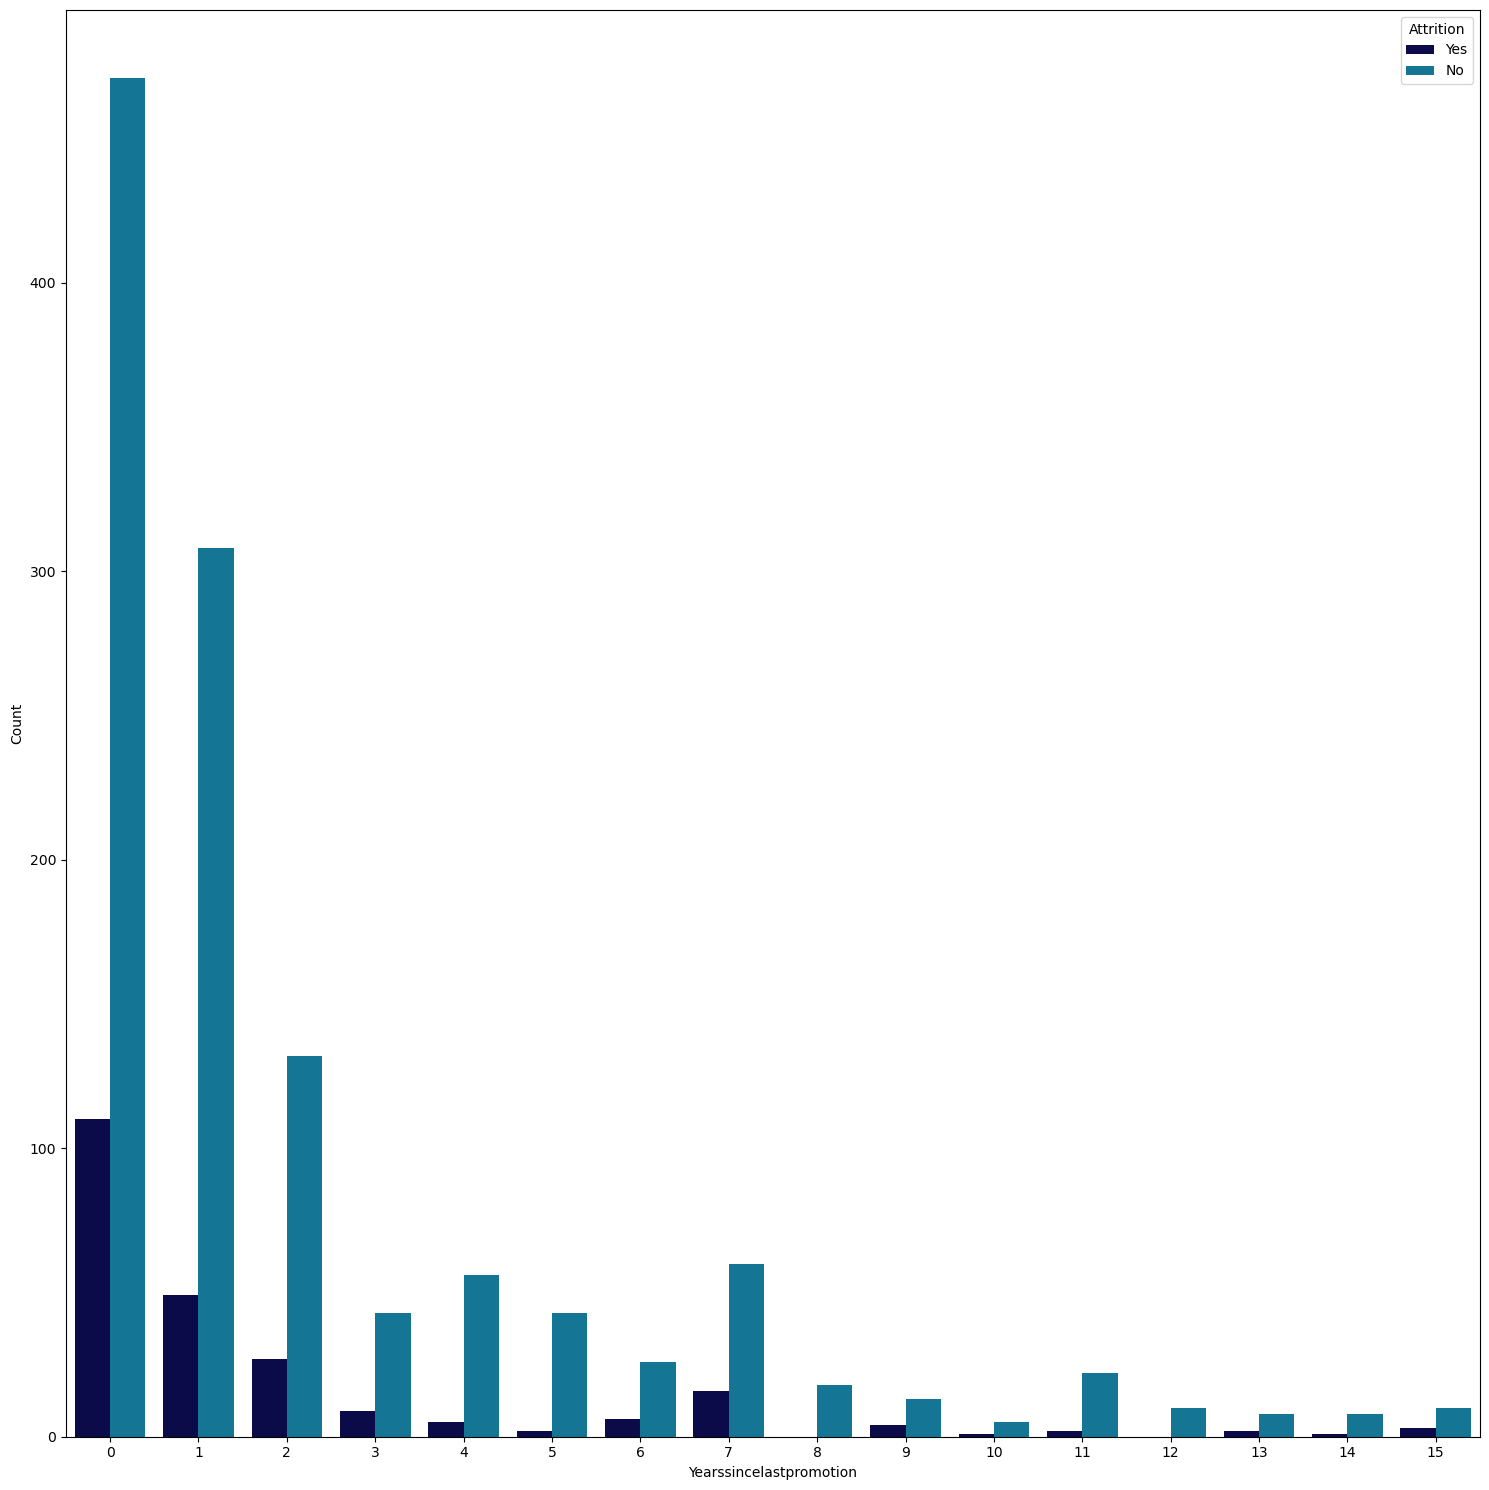

In [56]:
#Confirming the significance of years since last promotion
plt.figure(figsize=(15, 15))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=data, palette='ocean')
plt.xlabel('Yearssincelastpromotion')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

This would contradict my previous findings, but I recall that Yearssincelastpromotion was heavily skewed, which would explain this. 

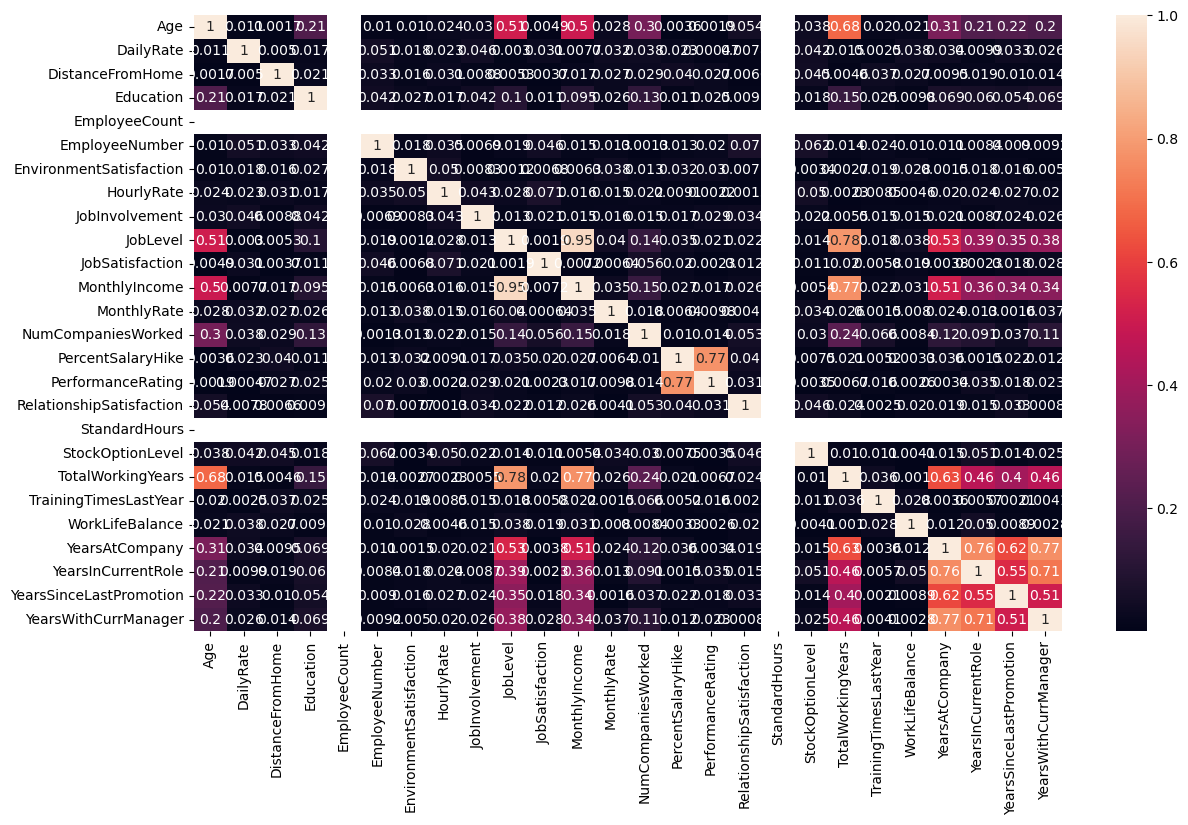

In [57]:
#Explore correlation
df_corr= data.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

Employee count, employee number and standard hours are irrelevant, so I will drop them and explore correlation again.

In [58]:
# Dropping irrelevant columns
data.drop(columns=["EmployeeCount", "StandardHours", "EmployeeNumber"], axis=1, inplace=True)

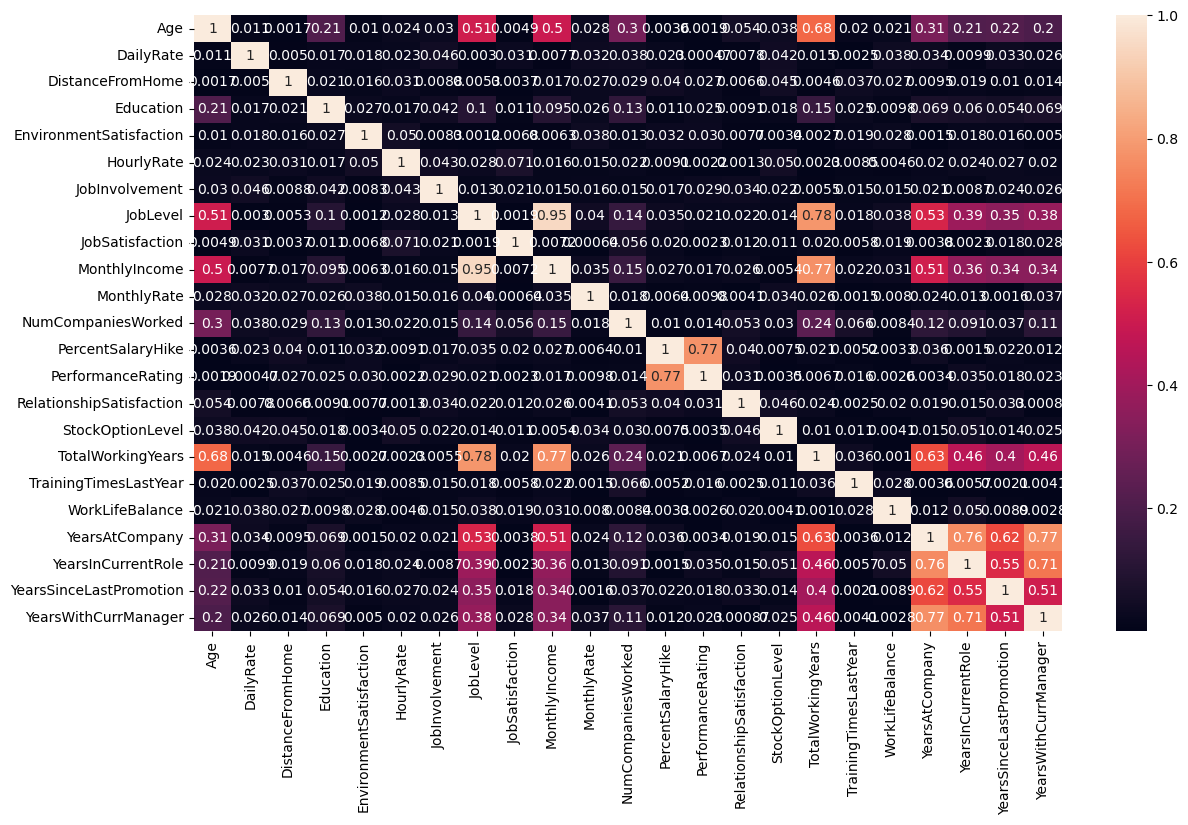

In [59]:
#Explore correlation now that irrelevant data has been dropped
df_corr= data.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

High correlation between monthly income and joblevel, performance rating and percent salary hike, years at company and monthly income, years at company and job level as well as age being highly correlated with total working years, job level and monthly income.

In [60]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRateBin,HourlyRateBin
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,8,0,1,6,4,0,5,"[1100, 1200)",NaN
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,10,3,3,10,7,1,7,"[200, 300)","[60.0, 70.0)"
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,7,3,3,0,0,0,0,"[1300, 1400)",NaN
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0,8,3,3,8,7,3,0,"[1300, 1400)","[50.0, 60.0)"
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,1,6,3,3,2,2,2,2,"[500, 600)","[40.0, 50.0)"


In [61]:
data.dtypes

Age                            int64
Attrition                     object
BusinessTravel                object
DailyRate                      int64
Department                    object
DistanceFromHome               int64
Education                      int64
EducationField                object
EnvironmentSatisfaction        int64
Gender                        object
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                       object
JobSatisfaction                int64
MaritalStatus                 object
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                      object
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
W

In [62]:
# Convert catagorical columns to Int format to look at correlation in other features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Input = ['Attrition','BusinessTravel','Department','EducationField','Gender','OverTime','JobRole','Over18','MaritalStatus']

for i in Input:
    data[i] = le.fit_transform(data[i])

In [63]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRateBin,HourlyRateBin
0,41,1,2,1102,2,1,2,1,2,0,...,0,8,0,1,6,4,0,5,"[1100, 1200)",NaN
1,49,0,1,279,1,8,1,1,3,1,...,1,10,3,3,10,7,1,7,"[200, 300)","[60.0, 70.0)"
2,37,1,2,1373,1,2,2,4,4,1,...,0,7,3,3,0,0,0,0,"[1300, 1400)",NaN
3,33,0,1,1392,1,3,4,1,4,0,...,0,8,3,3,8,7,3,0,"[1300, 1400)","[50.0, 60.0)"
4,27,0,2,591,1,2,1,3,1,1,...,1,6,3,3,2,2,2,2,"[500, 600)","[40.0, 50.0)"


In [64]:
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


In [65]:
data.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
JobRole                     0.067151
D

Majority of these features have negative correlation with the target.

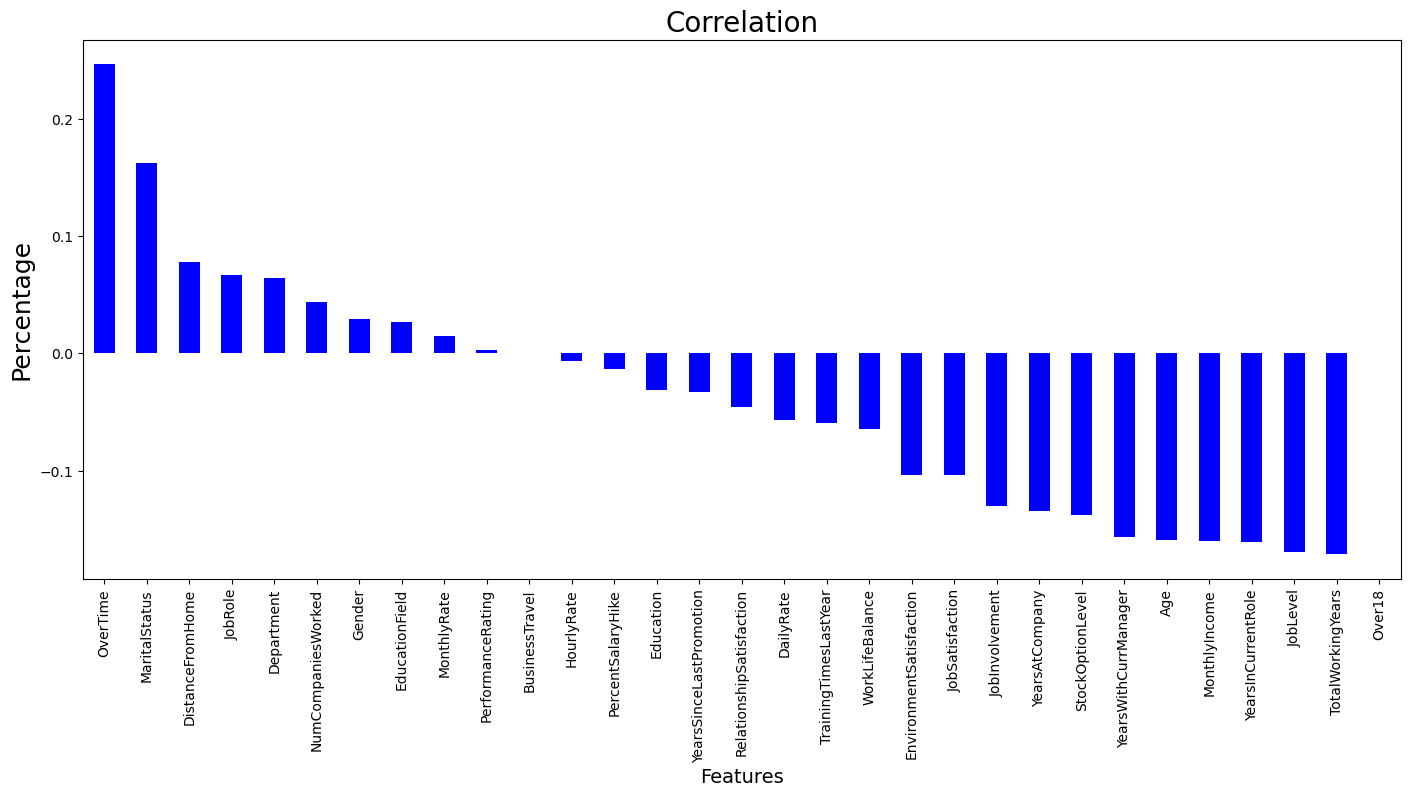

In [66]:
plt.figure(figsize=(17,7))
data.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='Blue')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Percentage',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

Overtime, marital staus and distance from home are top three highest positively correlated features, with total working years, job level and years in current role having the highest negative correlation. 

Age                            AxesSubplot(0.125,0.786098;0.133621x0.0939024)
Attrition                   AxesSubplot(0.285345,0.786098;0.133621x0.0939024)
BusinessTravel               AxesSubplot(0.44569,0.786098;0.133621x0.0939024)
DailyRate                   AxesSubplot(0.606034,0.786098;0.133621x0.0939024)
Department                  AxesSubplot(0.766379,0.786098;0.133621x0.0939024)
DistanceFromHome               AxesSubplot(0.125,0.673415;0.133621x0.0939024)
Education                   AxesSubplot(0.285345,0.673415;0.133621x0.0939024)
EducationField               AxesSubplot(0.44569,0.673415;0.133621x0.0939024)
EnvironmentSatisfaction     AxesSubplot(0.606034,0.673415;0.133621x0.0939024)
Gender                      AxesSubplot(0.766379,0.673415;0.133621x0.0939024)
HourlyRate                     AxesSubplot(0.125,0.560732;0.133621x0.0939024)
JobInvolvement              AxesSubplot(0.285345,0.560732;0.133621x0.0939024)
JobLevel                     AxesSubplot(0.44569,0.560732;0.1336

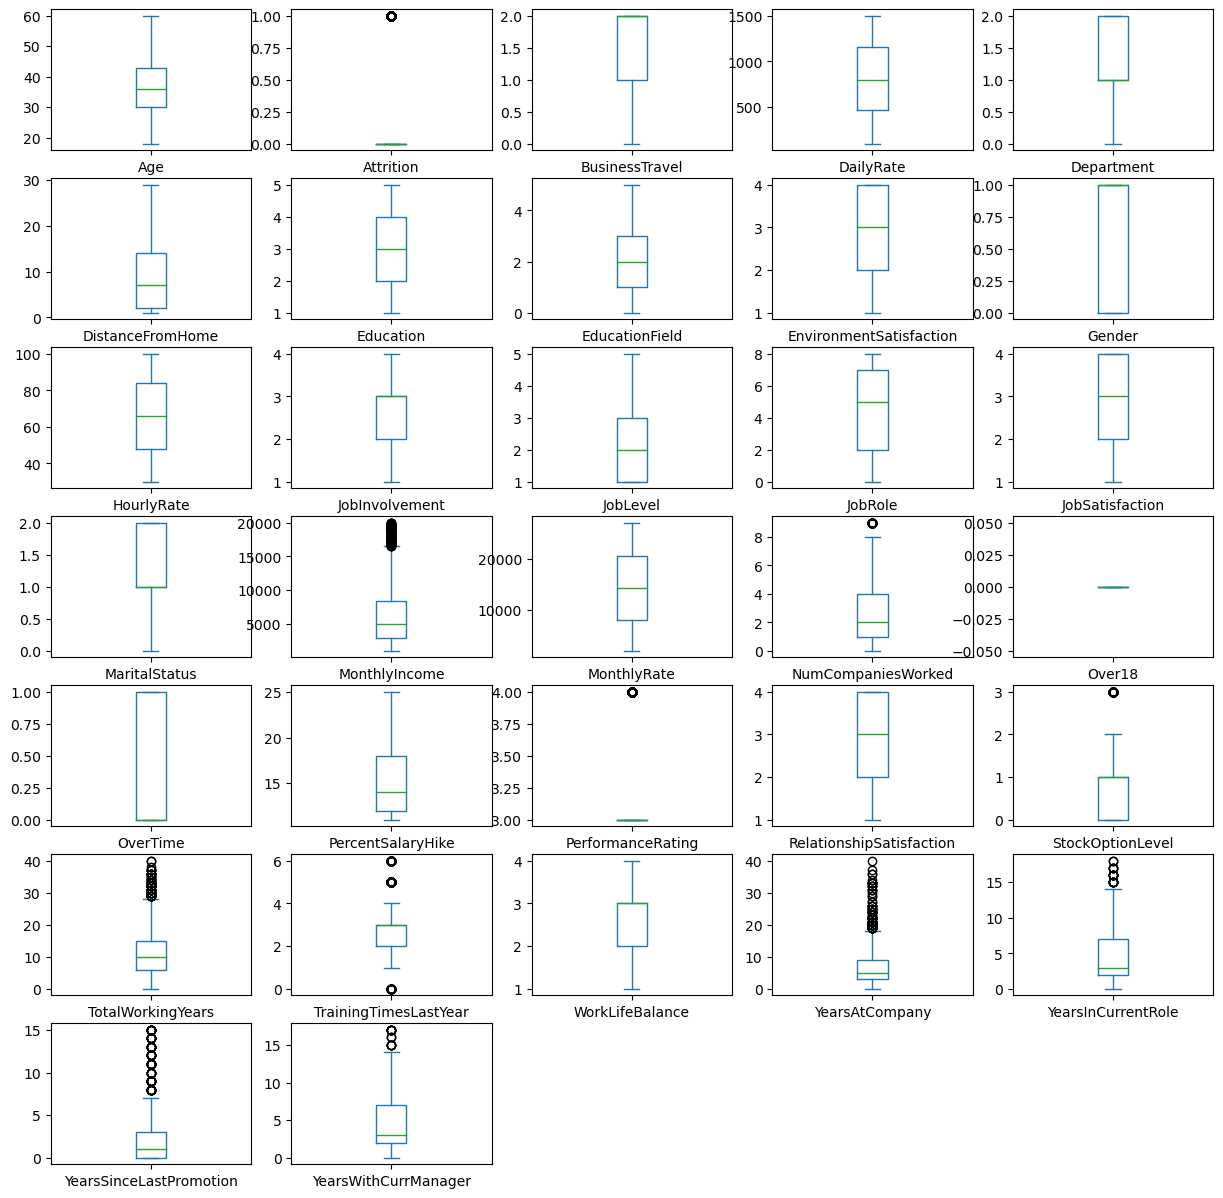

In [67]:
#Exploring outliers
data.plot(kind='box',subplots=True,layout=(7,5),figsize=(15,15))

Monthly Income,NumCompaniesWorked,Performance rating, Stock option level,Total Working Years,Training Time Last Year ,Years At Company ,Years at company,Years in current Role ,Years Since last promotion and Year With Current Manager have outliers that we can fix with zscore method.

In [68]:
#Using Zscore to remove outliers
data.shape

(1470, 34)

In [69]:
# Dropping bins
data.drop(columns=["DailyRateBin", "HourlyRateBin"], axis=1, inplace=True)

In [70]:
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([31, 30, 28, 30, 29, 30, 25, 25, 28, 30, 29, 30, 31, 25, 28, 30, 31,
        30, 25, 31, 28, 29, 30, 29, 31, 28, 30, 25, 28, 29, 30, 30, 31, 25,
        28, 28, 30, 30, 25, 29, 28, 28, 30, 28, 31, 30, 28, 25, 28, 30, 31,
        25

In [71]:
outliers = np.where(z>3)
outlier_rows = outliers[0]
data_new = data.drop(outlier_rows)

In [72]:
data_new.shape

(1387, 32)

In [73]:
DataLoss=((1470-1387)/1470)*100
DataLoss

5.646258503401361

5.64% is an acceptable percentage of data loss

In [74]:
#Dealing with skewness before model training
data_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
Over18                      0.000000
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
W

In [76]:
#Using Yeojohnson to deal with skewness
from sklearn.preprocessing import PowerTransformer

columns_to_transform=['EducationField','BusinessTravel','WorkLifeBalance','TrainingTimesLastYear','YearsWithCurrManager', 'YearsInCurrentRole','PercentSalaryHike','OverTime','DistanceFromHome','StockOptionLevel','TotalWorkingYears','NumCompaniesWorked','JobLevel','YearsAtCompany','MonthlyIncome','YearsSinceLastPromotion','PerformanceRating']          
PT = PowerTransformer(method='yeo-johnson')

data_new[columns_to_transform] = PT.fit_transform(data_new[columns_to_transform])


In [78]:
data_new.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.638730,1102,2,-1.489968,2,-0.965129,2,0,...,0.0,1,-1.084263,-0.173231,-2.608524,-2.14795,0.231837,0.290524,-1.073534,0.582177
1,49,0,-1.380776,279,1,0.244561,1,-0.965129,3,1,...,0.0,4,0.548653,0.147620,0.217074,0.27486,0.948319,1.006575,0.193168,1.018073
2,37,1,0.638730,1373,1,-1.028366,2,1.239552,4,1,...,0.0,2,-1.084263,-0.351153,0.217074,0.27486,-2.156089,-1.571814,-1.073534,-1.528426
3,33,0,-1.380776,1392,1,-0.698191,4,-0.965129,4,0,...,0.0,3,-1.084263,-0.173231,0.217074,0.27486,0.621429,1.006575,1.027520,-1.528426
4,27,0,0.638730,591,1,-1.028366,1,0.689982,1,1,...,0.0,4,0.548653,-0.544046,0.217074,0.27486,-0.933983,-0.390769,0.722874,-0.347871


In [79]:
data_new.skew().sort_values()

BusinessTravel             -0.960583
JobInvolvement             -0.501401
Gender                     -0.417296
JobRole                    -0.386843
JobSatisfaction            -0.345612
EnvironmentSatisfaction    -0.325285
RelationshipSatisfaction   -0.295686
Education                  -0.289024
MaritalStatus              -0.160952
YearsWithCurrManager       -0.070570
YearsInCurrentRole         -0.069631
HourlyRate                 -0.030481
YearsAtCompany             -0.025230
DailyRate                  -0.017078
WorkLifeBalance            -0.011133
TotalWorkingYears          -0.009666
EducationField             -0.008642
DistanceFromHome           -0.008149
PerformanceRating           0.000000
Over18                      0.000000
NumCompaniesWorked          0.016175
MonthlyIncome               0.027700
MonthlyRate                 0.030596
TrainingTimesLastYear       0.057949
StockOptionLevel            0.089929
JobLevel                    0.110769
PercentSalaryHike           0.112128
D

Skewness has been reduced

In [80]:
#Seperate into dependent and independent variables
x=data_new.drop (columns=['Attrition'], axis=1)
y=data_new['Attrition']

In [81]:
data_new.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.638730,1102,2,-1.489968,2,-0.965129,2,0,...,0.0,1,-1.084263,-0.173231,-2.608524,-2.14795,0.231837,0.290524,-1.073534,0.582177
1,49,0,-1.380776,279,1,0.244561,1,-0.965129,3,1,...,0.0,4,0.548653,0.147620,0.217074,0.27486,0.948319,1.006575,0.193168,1.018073


In [82]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data_new)
x_scaled

array([[ 0.5366811 ,  2.24872599,  0.63872976, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.44211114, -0.44469624, -1.38077628, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.08396607,  2.24872599,  0.63872976, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.04782149, -0.44469624,  0.63872976, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.44211114, -0.44469624, -1.38077628, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.2555702 , -0.44469624,  0.63872976, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

In [83]:
#import libraries for ML training 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [84]:
#Split data into Xtrain/test and ytrain/test
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.2, random_state= 3)

In [86]:
from sklearn.metrics import make_scorer

rf = RandomForestClassifier()
lr = LogisticRegression()

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring=make_scorer(accuracy_score), cv=5)
grid_search_lr = GridSearchCV(lr, param_grid_lr, scoring=make_scorer(accuracy_score), cv=5)

grid_search_rf.fit(x_train, y_train)
grid_search_lr.fit(x_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

best_model_rf = grid_search_rf.best_estimator_
best_model_lr = grid_search_lr.best_estimator_

y_pred_rf = best_model_rf.predict(x_test)
y_pred_lr = best_model_lr.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Best Random Forest Model - Hyperparameters: {best_params_rf}, Accuracy: {accuracy_rf}")
print(f"Best Logistic Regression Model - Hyperparameters: {best_params_lr}, Accuracy: {accuracy_lr}")

Best Random Forest Model - Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}, Accuracy: 0.8812949640287769
Best Logistic Regression Model - Hyperparameters: {'C': 1, 'penalty': 'l2'}, Accuracy: 0.8884892086330936


Logistic regression is performing better, so will proceed with lr model. 

In [89]:
lr=LogisticRegression(C= 1, penalty= 'l2')
lr.fit(x_train, y_train)


LogisticRegression(C=1)

In [90]:
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Model - Accuracy: {accuracy}")

Logistic Regression Model - Accuracy: 0.8884892086330936


Happy with this score

In [91]:
from sklearn.metrics import classification_report
print ( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       241
           1       0.62      0.41      0.49        37

    accuracy                           0.89       278
   macro avg       0.77      0.68      0.71       278
weighted avg       0.88      0.89      0.88       278



In [93]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

x= data.drop (columns= ['Attrition'])
y= data ['Attrition']
lr = LogisticRegression()

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) 
accuracy_scores = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr.fit(x_train, y_train)

    y_pred = lr.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

mean_accuracy = sum(accuracy_scores) / n_splits
print(f"Mean Accuracy: {mean_accuracy:.2f}")


Mean Accuracy: 0.84


In [95]:
import pickle
filename= 'Attrition.pkl'
pickle.dump(lr, open(filename,'wb'))
loaded_model= pickle.load(open('Attrition.pkl', 'rb'))

In [96]:
compare={"Actual": y_test, "Predict": y_pred}
pd.DataFrame(compare)

,Actual,Predict
1,0,0
8,0,0
13,0,0
14,1,0
20,0,0
...,...,...
1443,0,0
1446,0,0
1455,0,0
1459,0,0
